 1. Download the dataset: Dataset

2. Load the dataset.

In [152]:
import pandas as pd
import numpy as np

In [153]:
file=pd.read_csv("Churn_Modelling.csv")
df=pd.DataFrame(file)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [154]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 3. Perform Below Visualizations:
Univariate Analysis, Bi - Variate Analysis, Multi - Variate Analysis

,index,Exited
0,0,0.7963
1,1,0.2037


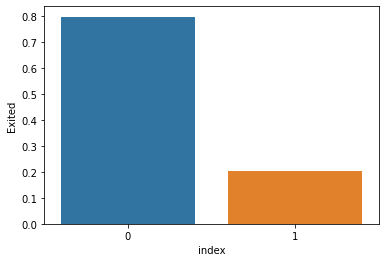

In [155]:
import seaborn as sns
density = df['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=density, x='index', y='Exited', );
density

the data is significantly imbalanced

In [156]:
import matplotlib.pyplot as plt

In [ ]:
categorical = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
rows = int(np.ceil(categorical.shape[1] / 2)) - 1

# create sub-plots anf title them
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col]
        ax = axes[row*2 + col]       

        sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax);
        
plt.tight_layout()

4. Perform descriptive statistics on the dataset.

In [ ]:
df.info()

In [ ]:
df.describe()

5. Handle the Missing values.

In [ ]:
df.isna().sum()

### there is no missing values in dataset

In [ ]:
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        print("unique of "+i+" is "+str(len(set(df[i])))+" they are "+str(set(df[i])))

 6. Find the outliers and replace the outliers

Checking for outliers

In [ ]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

In [ ]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

In [ ]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

In [ ]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

In [ ]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()

Removing outliers

In [ ]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])
        

 After removing outliers, boxplot will be like

In [ ]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

In [ ]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

In [ ]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

7. Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=encoder.fit_transform(df[i])

8. Split the data into dependent and independent variables.

In [ ]:
x=df.iloc[:,:-1]
x.head()

In [ ]:
y=df.iloc[:,-1]
y.head()

9. Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
x

10. Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape